## **NLP: High Frequency Words**

**Submitted by:** Euclides

**Course:** CUNY DATA 620

**Data Source:** New York City Electrical Code  

### **Introduction**

Using the 2025 New York City Electrical Code as a corpus examine the following: 

1. How many total unique words are in the corpus? 
2. Taking the most common words, how many unique words represent half of the total words in the corpus?
3. Identify the 200 highest frequency words in this corpus.
4. Create a graph that shows the relative frequency of these 200 words
5. Does the observed relative frequency of these words follow Zipf’s law? Explain.
6. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

**Dataset:**  
  
The New York City Electrical Code governs the electrical installation requirements of within the City of New York. Nationally, the country generally follows the National Electrical Code.  Due to unique condition of New York City as a high density population municipality and high rise commercial buildings, the City amends the national code. These amendments to the National Electrical Code are what is referred to as the New York City Electrical Code.  A pdf copy of these amendments can be found on the New York City Building Code Website.  


### **Load Libraries and Corpus**

In [87]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import os
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter 
from nltk.corpus import stopwords

In [88]:
#NLTK Downloads 
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\erodr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erodr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### **The Corpus with Raw text**

In [59]:
#Load filepath and filename

filename = "2025 NYC Electrical Code.txt"


# Read from a local text file
f = open(filename, encoding="utf8")
raw = f.read()

# Tokenize the text
tokens = word_tokenize(raw)

# First 10 Tokens 
print("First 10 Tokens are:", tokens[:10])

First 10 Tokens are: ['LOCAL', 'LAWS', 'OF', 'THE', 'CITY', 'OF', 'NEW', 'YORK', 'FOR', 'THE']


In [60]:
print("Total Number of Words in Corpus", len(tokens))

Total Number of Words in Corpus 44804


In [61]:
# Get unique tokens using a set
unique_tokens = set(tokens)

# Count the number of unique tokens
num_unique_tokens = len(unique_tokens)

# Print result
print("Total unique tokens:", num_unique_tokens)

Total unique tokens: 4087


In [62]:
# Make all tokens lowercase to count words case-insensitively and only keep words (no punctuation)
tokens = [token.lower() for token in tokens if token.isalpha()]  

# Count word frequencies
word_freq = Counter(tokens)

# Get the most common words (e.g., top 10)
most_common_words = word_freq.most_common(10)

# Print them
print("Top 10 most frequent words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

Top 10 most frequent words:
the: 1853
of: 1305
to: 1047
and: 957
section: 899
or: 788
a: 771
shall: 755
in: 749
be: 695


### **Corpus with Unique Words**

In [63]:
#Remove Stopwords after tokenizaiton

stop_words = set(stopwords.words('english'))

tokens_filter = []
for word in tokens:
    if word not in stop_words:
        tokens_filter.append(word)


print("First 10 Tokens without stopwords are:", tokens_filter[:10])


First 10 Tokens without stopwords are: ['local', 'laws', 'city', 'new', 'york', 'year', 'introduced', 'council', 'members', 'sanchez']


In [64]:
# Get unique tokens using a set
unique_tokens_filter = set(tokens_filter)

# Count the number of unique tokens
num_unique_tokens_filter = len(unique_tokens_filter)

# Print result
print("Total unique tokens without stopwords are:", num_unique_tokens_filter)

Total unique tokens without stopwords are: 2387


### **Top Common Words and Frequency**

In [66]:
# Count word frequencies
word_freq_filter = Counter(tokens_filter)

# Get the most common words (e.g., top 10)
most_common_words_filter = word_freq_filter.most_common(10)

# Print them
print("Top 10 most frequent words without stopwords:")
for word, freq in most_common_words_filter:
    print(f"{word}: {freq}")

Top 10 most frequent words without stopwords:
section: 899
shall: 755
follows: 329
read: 322
new: 291
fire: 241
code: 239
revise: 211
electrical: 210
city: 192


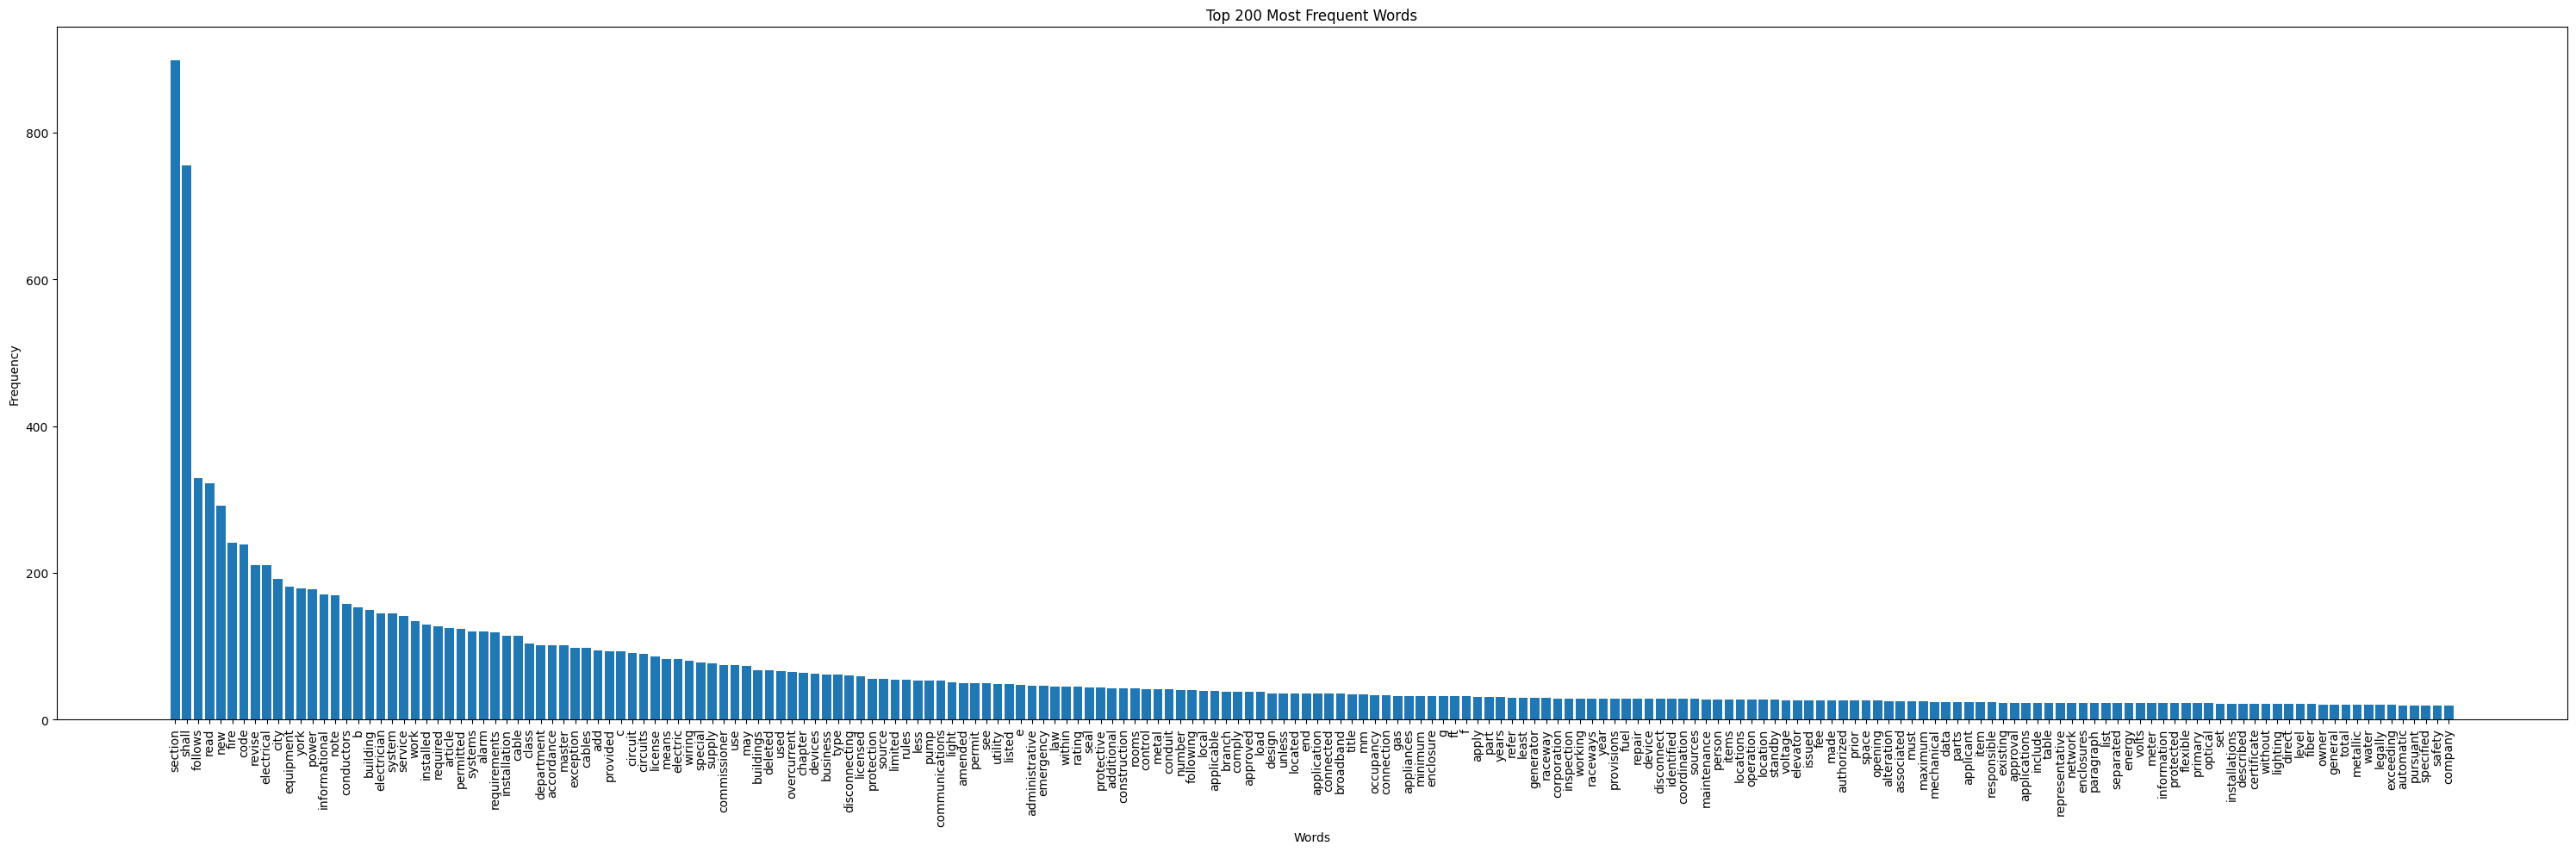

In [ ]:
# Top 200 words with the most frequency 
top200 = word_freq_filter.most_common(200)

# Prepare data for plotting
words, frequencies = zip(*top200)

# Plotting
plt.figure(figsize=(30, 10))
plt.bar(words, frequencies)
plt.xticks(rotation=90)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 200 Most Frequent Words")
plt.tight_layout()
plt.show()


### **Relative Frequency**

In [85]:
freq_list = []

for word, freq in top200:
    rel_freq = (word, round(freq/num_unique_tokens,4))
    freq_list = freq_list + [rel_freq]
    

print("Top 10 words and relative frequency:")
for word, freq in freq_list[:10]:
    print(f"{word}: {freq}")

Top 10 words and relative frequency:
section: 0.22
shall: 0.1847
follows: 0.0805
read: 0.0788
new: 0.0712
fire: 0.059
code: 0.0585
revise: 0.0516
electrical: 0.0514
city: 0.047


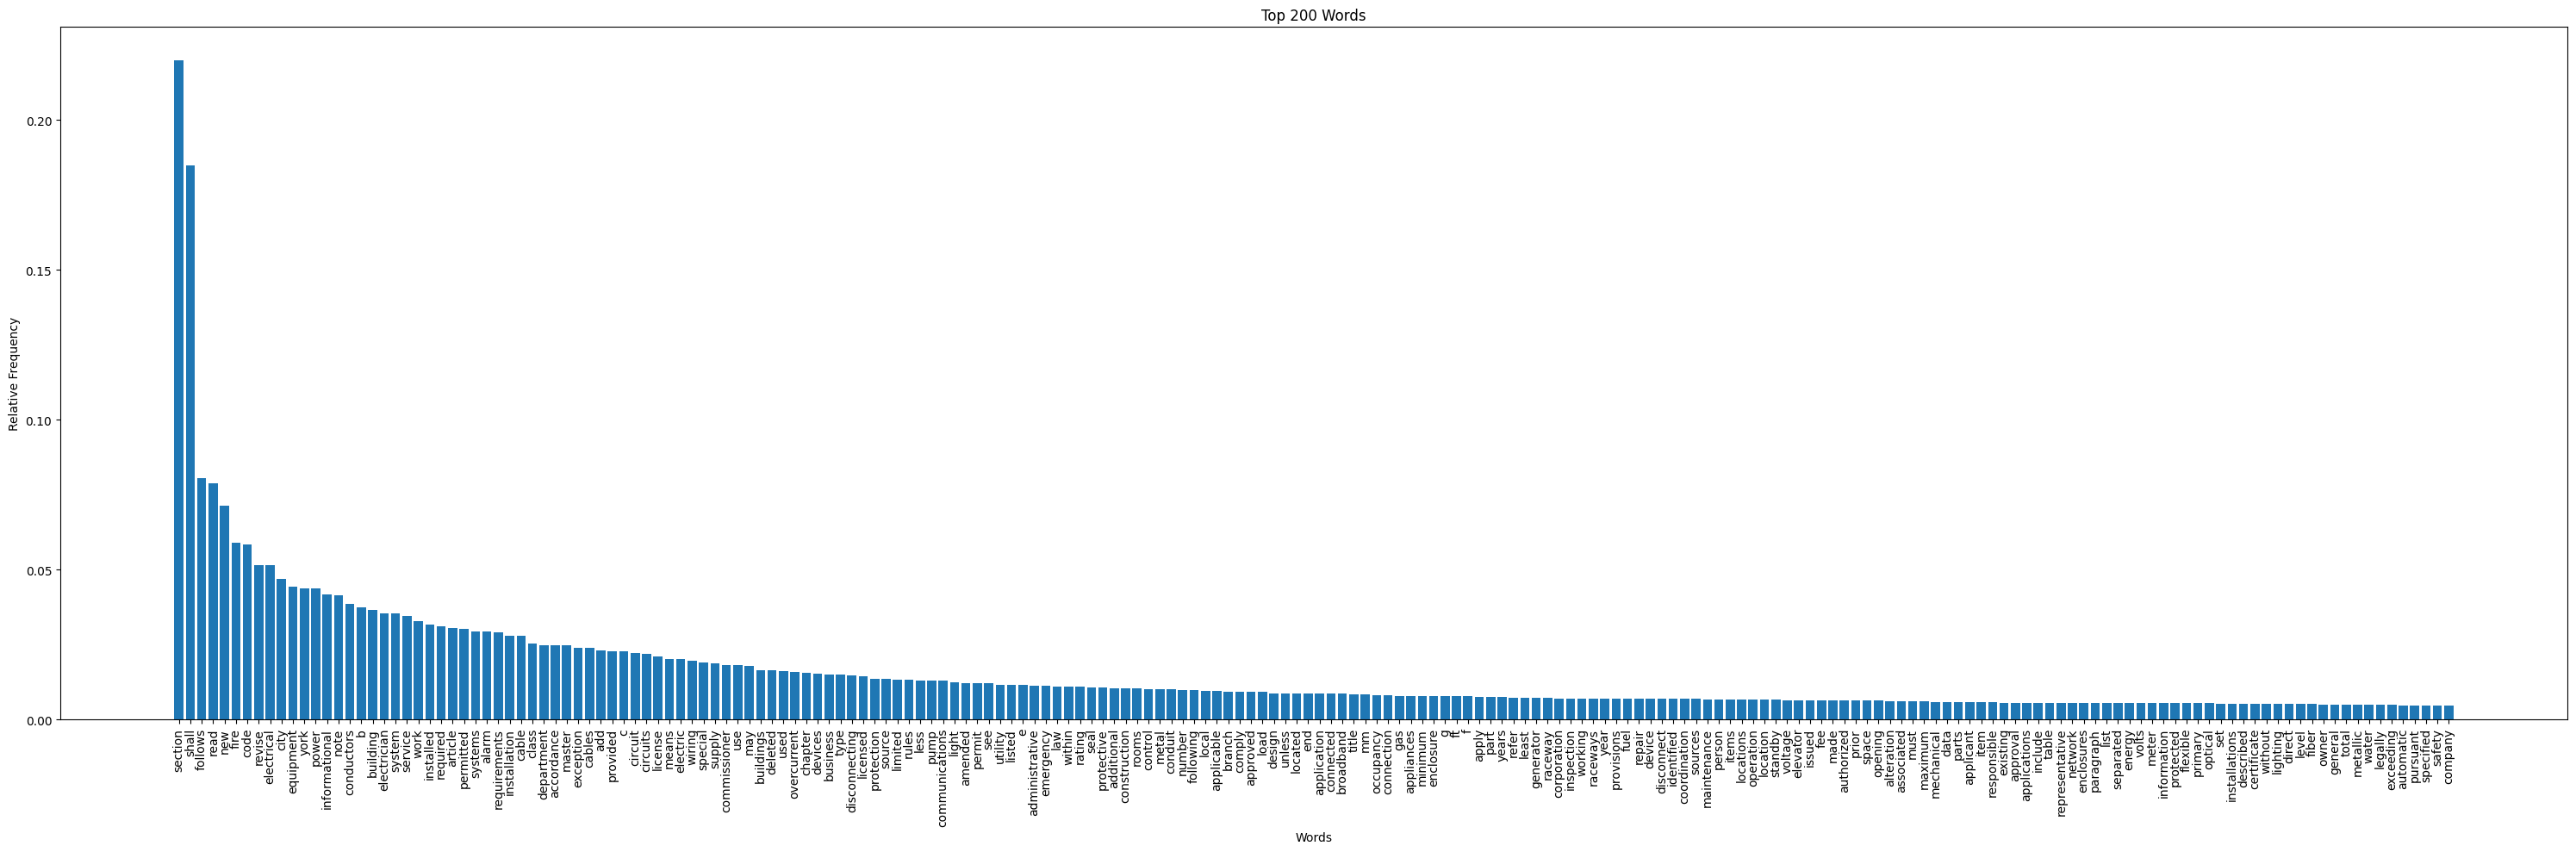

In [86]:
# Prepare data for plotting
words, frequencies = zip(*freq_list)

# Plotting
plt.figure(figsize=(30, 10))
plt.bar(words, frequencies)
plt.xticks(rotation=90)
plt.xlabel("Words")
plt.ylabel("Relative Frequency")
plt.title("Top 200 Words")
plt.tight_layout()
plt.show()

### **Zipf'Law**

According to Wikipedia, Zipf's law states "that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. So nth word has a frequency proportional to 1/n."  We see in this Corpus of Unique Words that Zip's Law remains true.  Comparing the word counts from the raw words corpus to the unique words corpus we would expect a similar distrubution.  Althrough select stop words have a high frequency counts we still see the unique words in the top frequency counts.   